In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

seaborn 0.10.1
numpy   1.19.5
pandas  1.1.4



In [2]:
file = "/mnt/btrfs/data/type_1/species_mc/b6_capitalist_split_by_sample/dual.index.b6"

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import plot_utils as pu

In [4]:
from collections import defaultdict

dd_cov = defaultdict(list)

with open(file) as inf:
    for line in inf:
        row = line.strip().split("\t")
        assembly = row[1]
        start, end = sorted([int(row[8]), int(row[9])])
        dd_cov[assembly].append((start, end))

In [5]:
#GCF_900187225.1 Monocytogenes 31832
#GCF_000195795.1 s__Listeria_innocua

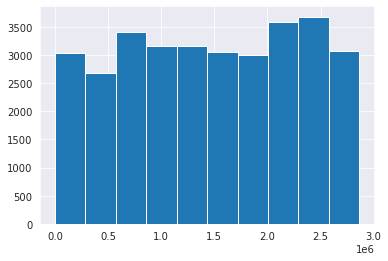

GCF_900187225.1
31832
['GCF_900187225.1\tk__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria_monocytogenes']


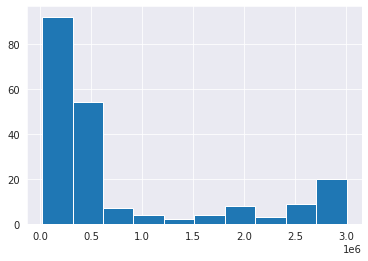

GCF_000195795.1
203
['GCF_000195795.1\tk__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria_innocua']


In [6]:
for k in ["GCF_900187225.1", "GCF_000195795.1"]:
    v = dd_cov[k]
    reference_name_length = max([max(_) for _ in v])
    coverage = np.zeros(shape=reference_name_length, dtype=int)
    for alignment in v:
        beginning = alignment[0]
        if beginning < 0:
            beginning = 0
        end = alignment[1]
        if end > reference_name_length:
            end = reference_name_length

        coverage[beginning:end] += 1
        
    #generate bins boundaries and heights
    array = [_[0] for _ in v]
    
    plt.hist(array)
    plt.show()
    print(k)
    print(len(array))
    results = !grep {k} "/mnt/btrfs/data/gtdb_95/gtdb_genomes_reps_r95/r95.gtdb.tax"
    print(results)

31832


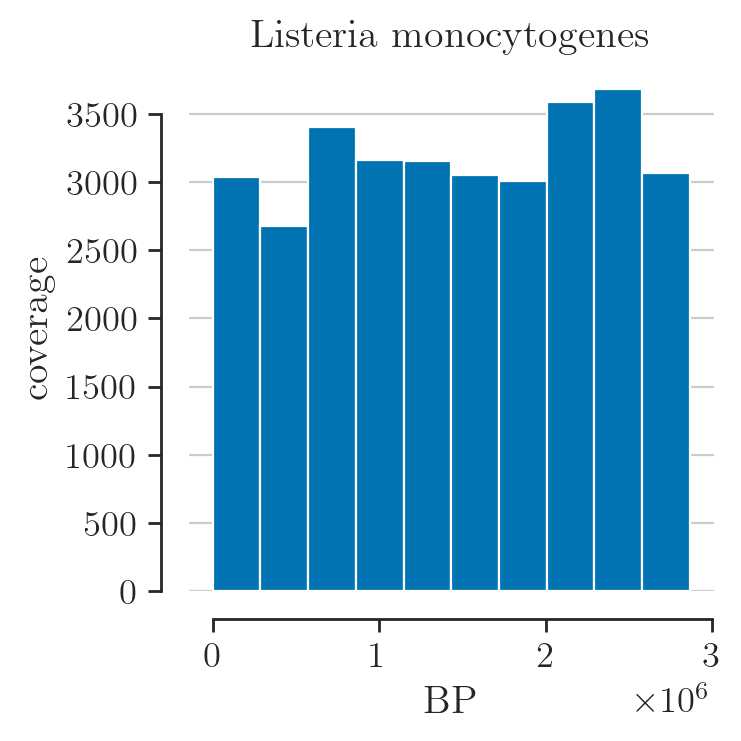

In [7]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())
fig_size = pu.get_fig_size(10, 10)
fig, ax = plt.subplots(figsize=fig_size)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

array = [_[0] for _ in dd_cov["GCF_900187225.1"]]
print(len(array))

# results, edges = np.histogram(array, normed=True)
# binWidth = edges[1] - edges[0]
# plt.bar(edges[:-1], results*binWidth, binWidth)

ax.hist(array)
plt.title("Listeria monocytogenes")

plt.xlabel("BP")
plt.ylabel("coverage")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

#generate bins boundaries and heights
pu.save_plot(fig, "coverage_listeria_monocytogenes")

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


203


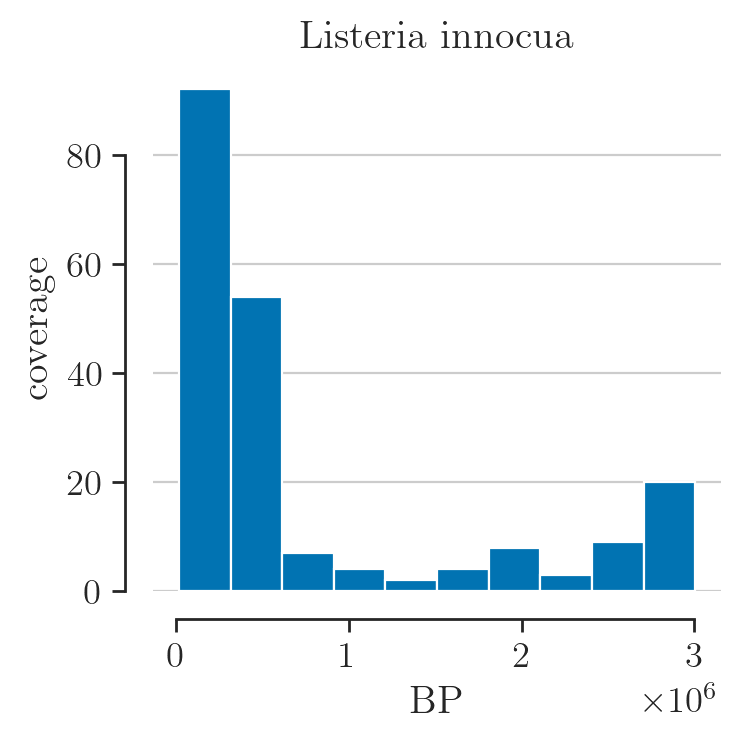

In [8]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())
fig_size = pu.get_fig_size(10, 10)
fig, ax = plt.subplots(figsize=fig_size)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

array = [_[0] for _ in dd_cov["GCF_000195795.1"]]
print(len(array))

# results, edges = np.histogram(array, normed=True)
# binWidth = edges[1] - edges[0]
# plt.bar(edges[:-1], results*binWidth, binWidth)

plt.xlabel("BP")
plt.ylabel("coverage")

ax.hist(array)

plt.title("Listeria innocua")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

pu.save_plot(fig, "coverage_listeria_innocua")